In [11]:
# Reads in a waveguide mode, centers it, and writes out a pkl file with center coords

# Created 2023 Mar 16 by E.S.

In [13]:
import pandas as pd
import numpy as np
import astropy
import os
import pickle
import matplotlib.pyplot as plt
from astropy.modeling import models, functional_models, fitting
from photutils.centroids import centroid_2dg

In [14]:
# read in intensity profile (source: Simon)

# Simon:
#The waveguide modes have a 4sigma diameter of 8.3x7.6um. A simple Gaussian fit gives a 1/e2 diameter of 5.8x5.4um. 
#Both at a wavelength of 1550nm.
#The attached CSV file contains the corresponding intensity profile. The scale is 0.2161um per pixel.

stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/'

mode_file_names = [stem + './data/AF45_100x_Zeiss_300um_1550nm_1000mmmin_67.5nJ.csv', 
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_1000mmmin_77.5nJ.csv', 
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_2000mmmin_67.5nJ.csv',
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_500mmmin_75nJ.csv',
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_750mmmin_50nJ.csv',
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_750mmmin_77.5nJ.csv']

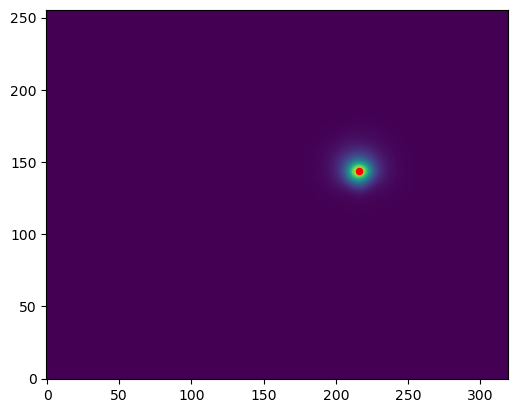

Wrote junk_AF45_100x_Zeiss_300um_1550nm_1000mmmin_67.5nJ.csv.pkl


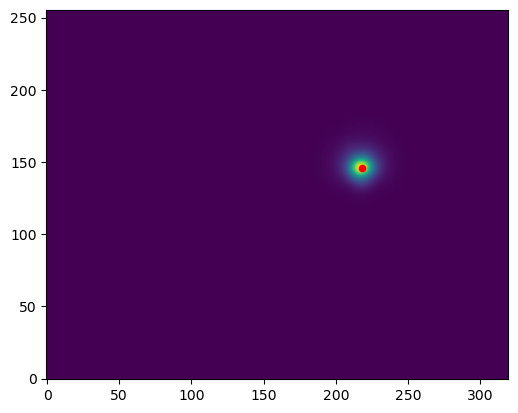

Wrote junk_AF45_100x_Zeiss_300um_1550nm_1000mmmin_77.5nJ.csv.pkl


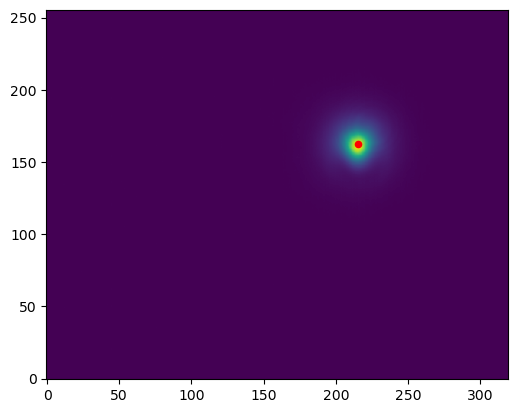

Wrote junk_AF45_100x_Zeiss_300um_1550nm_2000mmmin_67.5nJ.csv.pkl


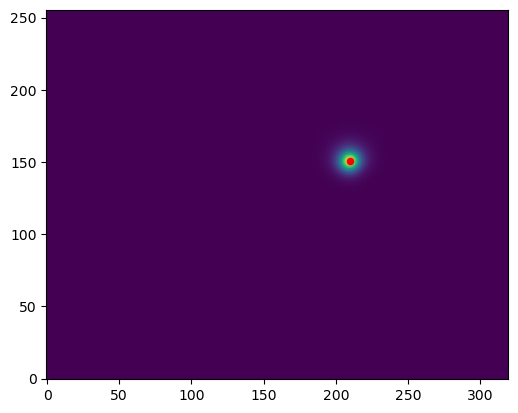

Wrote junk_AF45_100x_Zeiss_300um_1550nm_500mmmin_75nJ.csv.pkl


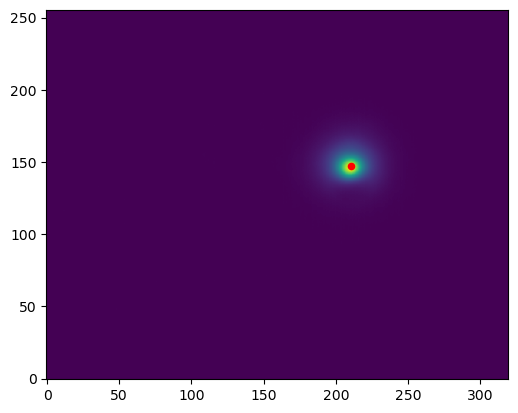

Wrote junk_AF45_100x_Zeiss_300um_1550nm_750mmmin_50nJ.csv.pkl


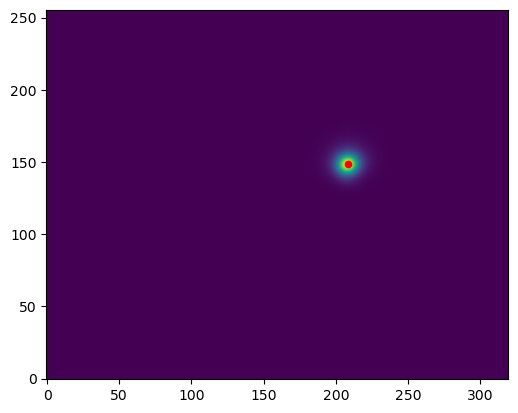

Wrote junk_AF45_100x_Zeiss_300um_1550nm_750mmmin_77.5nJ.csv.pkl


In [15]:
for file_name in mode_file_names:
    
    df_intensity = np.genfromtxt(file_name, delimiter=";")
    xycen = centroid_2dg(df_intensity)
    
    plt.clf()
    plt.imshow(df_intensity, origin="lower")
    plt.scatter(xycen[0],xycen[1], color='red', s=20)
    plt.show()
    
    # pickle
    file_name = 'junk_' + os.path.basename(file_name) + '.pkl'
    
    data_list = [df_intensity,xycen]
    open_file = open(file_name, "wb")
    pickle.dump(data_list, open_file)
    open_file.close()
    
    print('Wrote',file_name)